In [1]:
# Load dictionaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Others
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cs-training.csv')

In [3]:
df.head(4)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0


Data Clenaning

In [4]:
# find nan
nan_counts = df.isna().sum()
print("NaN summary\n", nan_counts)
df.describe()

NaN summary
 Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
# Drop unnecessary column
df.drop("Unnamed: 0", axis=1, inplace=True)

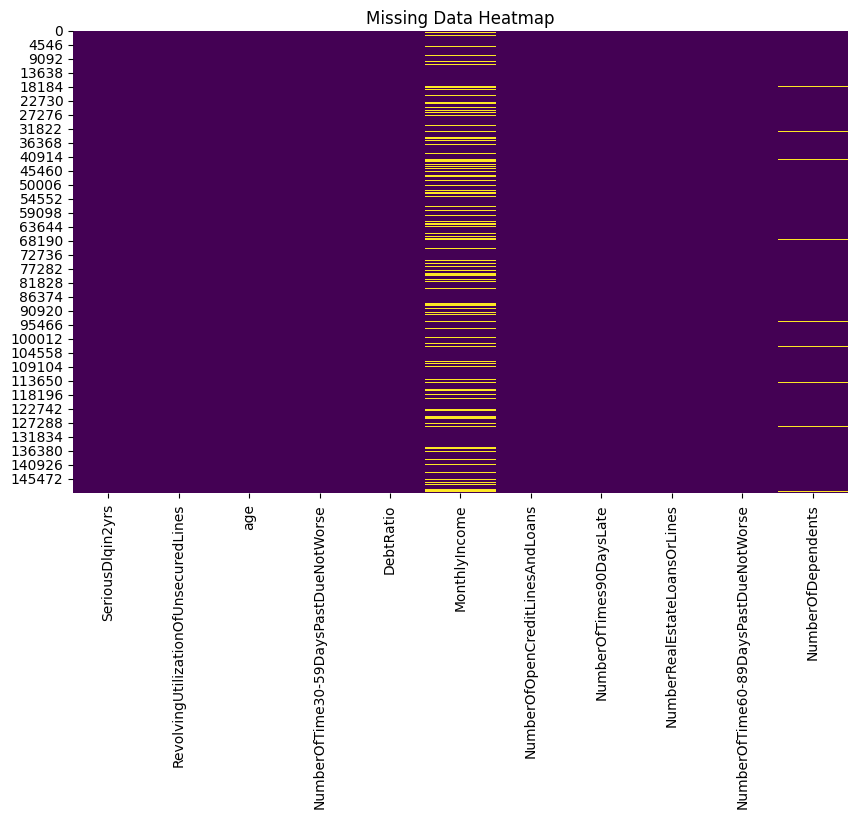

In [6]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
# Check skewness
print("Skewness of MonthlyIncome:", df["MonthlyIncome"].skew())

# Rule of thumb:
# - If skewness > 1 or < -1 => highly skewed → use median
# - If skewness between -1 and 1 => fairly symmetric → use mean


Skewness of MonthlyIncome: 114.0403179452332


In [8]:
from sklearn.impute import SimpleImputer

# Impute using median only on columns with missing values
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [9]:
# prompt: unique values in different clumns and checking if all the values have smae data type in the column

for col in df.columns:
  print(f"Column: {col}")
  unique_values = df[col].unique()
  print(f"Number of unique values: {len(unique_values)}")
  print(f"Unique values:\n{unique_values}")

  all_same_type = True
  if len(unique_values) > 0:
    first_type = type(unique_values[0])
    for val in unique_values:
      if type(val) != first_type:
        all_same_type = False
        break
  print(f"All values have the same data type: {all_same_type}")
  if not all_same_type:
    types_in_column = set(type(x) for x in df[col])
    print(f"Different data types found: {types_in_column}")
  print("-" * 30)


Column: SeriousDlqin2yrs
Number of unique values: 2
Unique values:
[1. 0.]
All values have the same data type: True
------------------------------
Column: RevolvingUtilizationOfUnsecuredLines
Number of unique values: 125728
Unique values:
[0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]
All values have the same data type: True
------------------------------
Column: age
Number of unique values: 86
Unique values:
[ 45.  40.  38.  30.  49.  74.  57.  39.  27.  51.  46.  76.  64.  78.
  53.  43.  25.  32.  58.  50.  69.  24.  28.  62.  42.  75.  26.  52.
  41.  81.  31.  68.  70.  73.  29.  55.  35.  72.  60.  67.  36.  56.
  37.  66.  83.  34.  44.  48.  61.  80.  47.  59.  77.  63.  54.  33.
  79.  65.  86.  92.  23.  87.  71.  22.  90.  97.  84.  82.  91.  89.
  85.  88.  21.  93.  96.  99.  94.  95. 101.  98. 103. 102. 107. 105.
   0. 109.]
All values have the same data type: True
------------------------------
Column: NumberOfTime30-59DaysPastDueNotWorse
Number 

In [10]:
# prompt: total uniwue values in SeriousDlqin2yrs column and there count in the coulnmn

# Calculate unique values and their counts in the 'SeriousDlqin2yrs' column
serious_dlqin_counts = df['SeriousDlqin2yrs'].value_counts()

print("\nTotal unique values and their counts in 'SeriousDlqin2yrs' column:")
serious_dlqin_counts


Total unique values and their counts in 'SeriousDlqin2yrs' column:


,count
SeriousDlqin2yrs,
0.0,139974
1.0,10026


In [11]:
df.isnull().sum()


,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


**Visulaization On Actual Data**

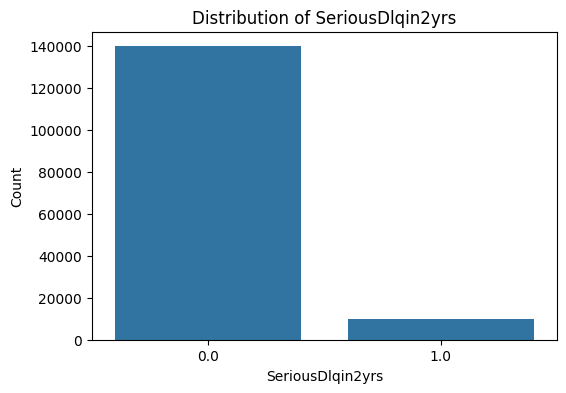

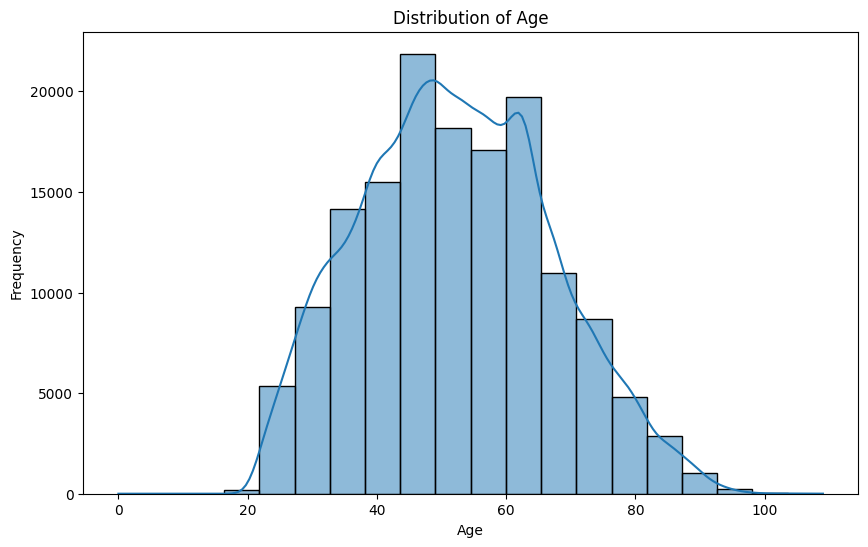

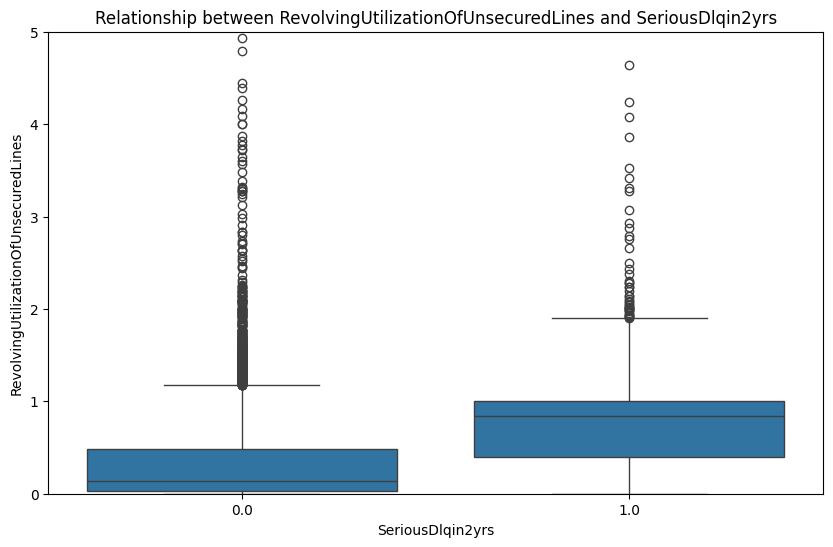

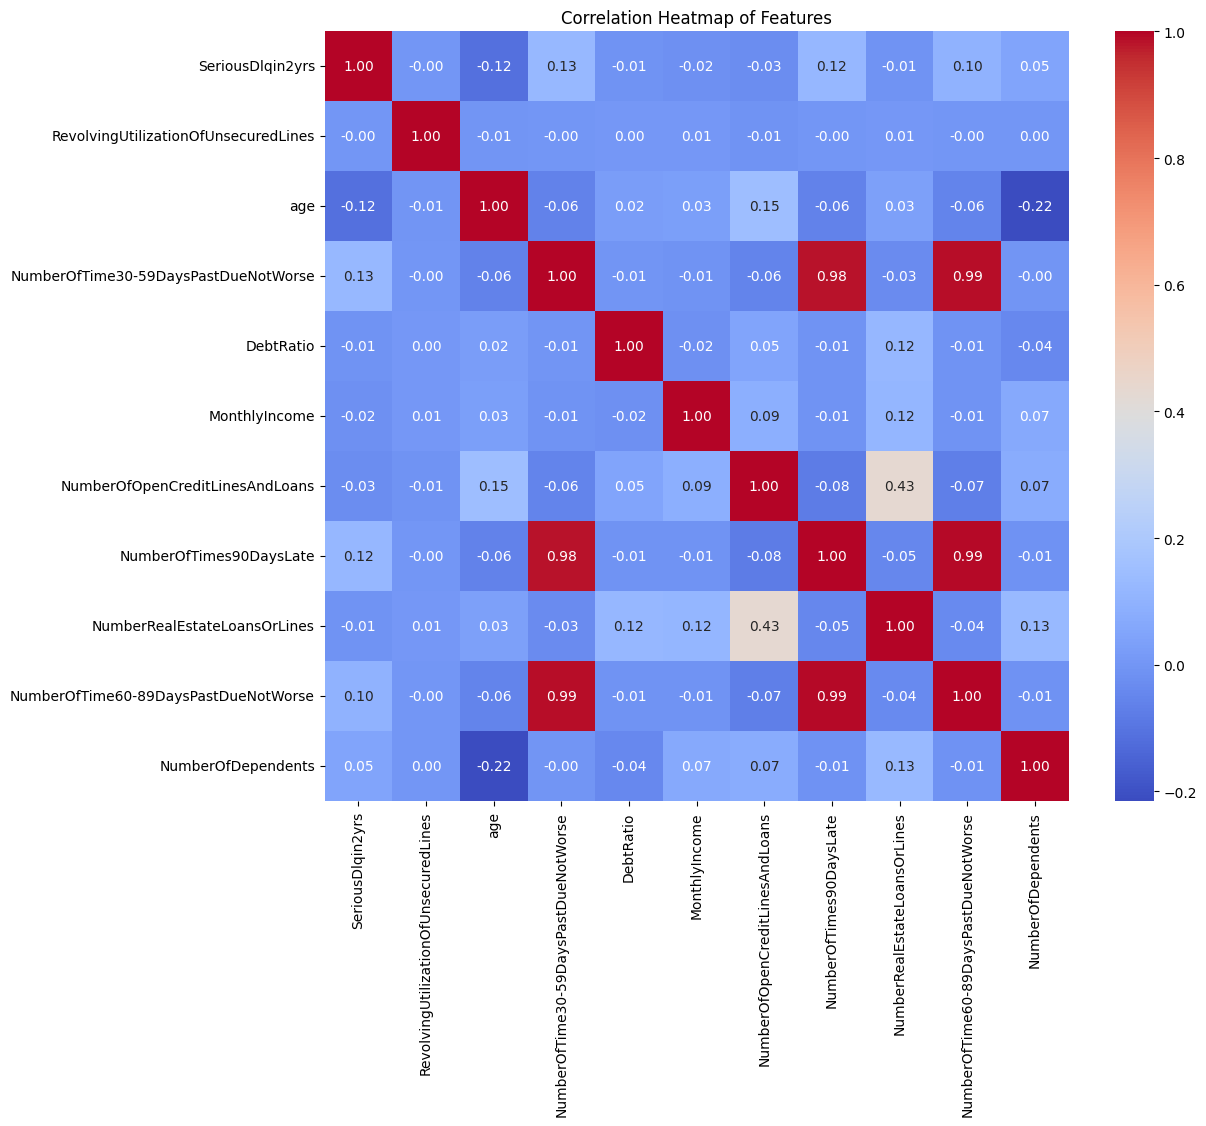

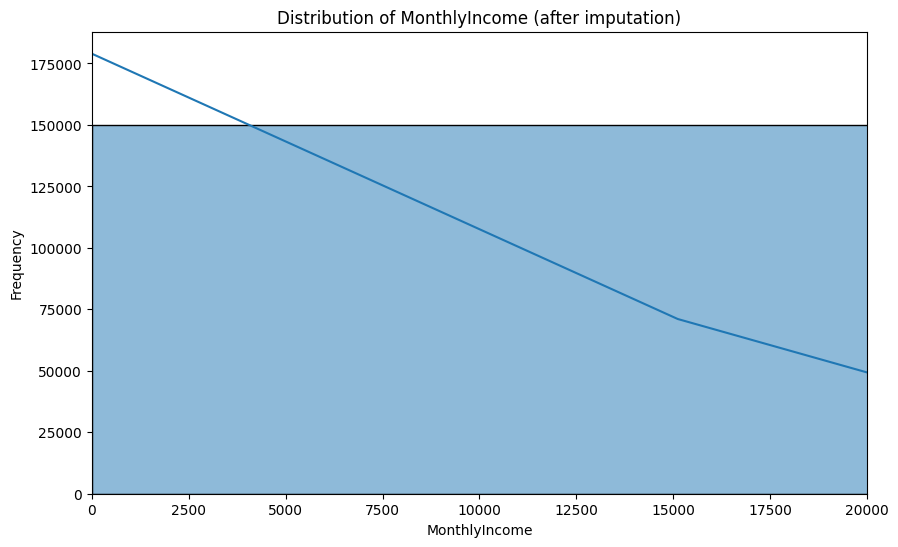

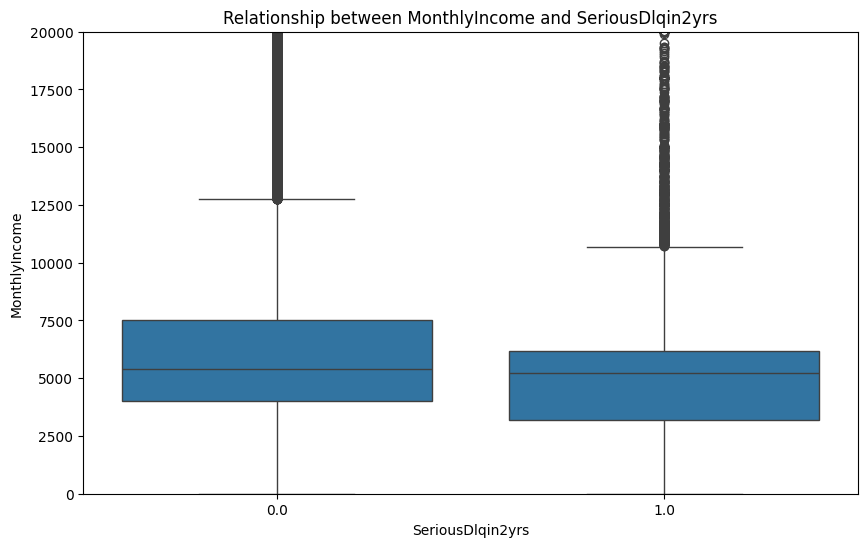

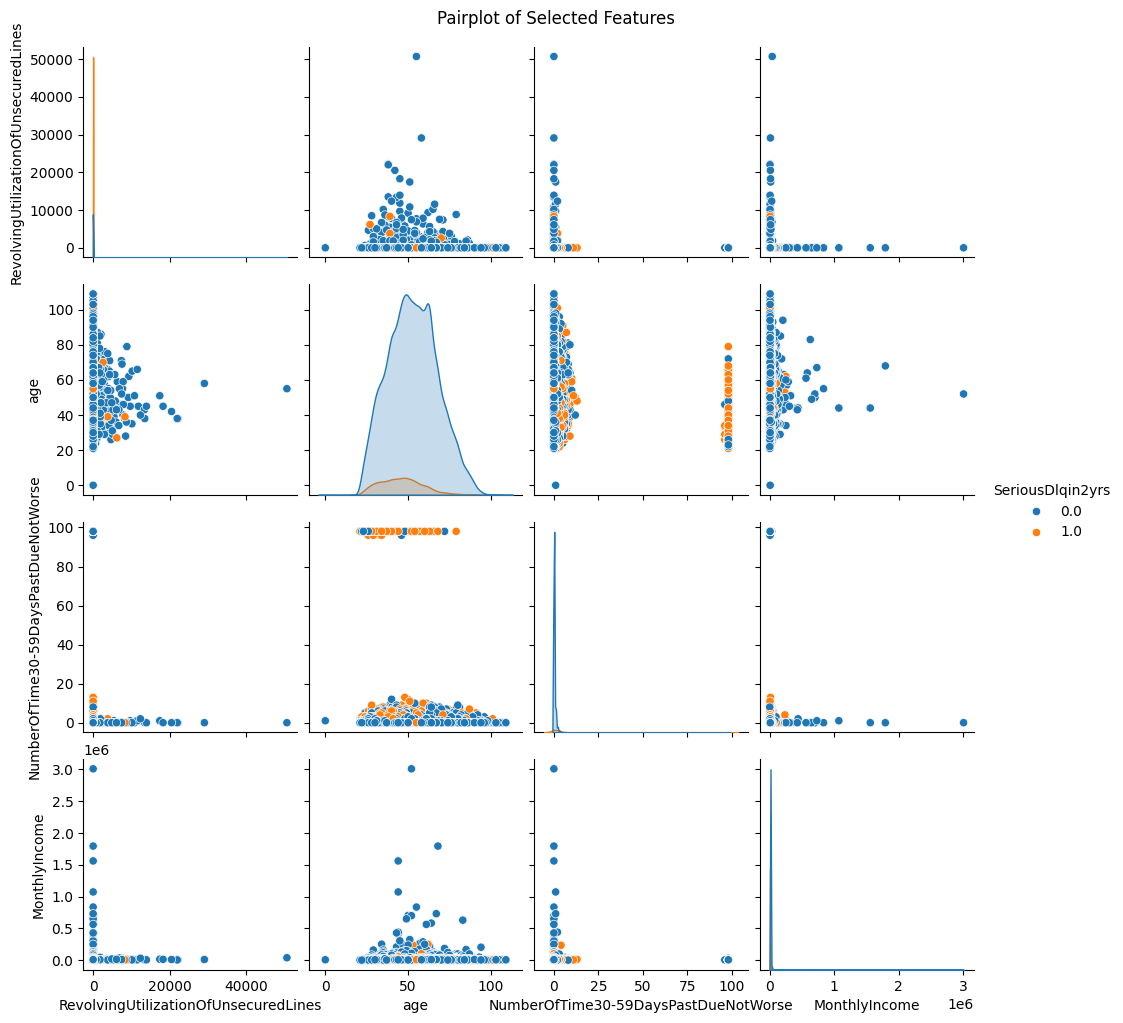

In [12]:
# prompt: write some visualization code for this

# Distribution of 'SeriousDlqin2yrs'
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribution of SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Count')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Relationship between RevolvingUtilizationOfUnsecuredLines and SeriousDlqin2yrs
plt.figure(figsize=(10, 6))
sns.boxplot(x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines', data=df)
plt.title('Relationship between RevolvingUtilizationOfUnsecuredLines and SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(0, 5) # Limiting y-axis to focus on the main distribution
plt.show()


# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Distribution of MonthlyIncome (after imputation)
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], bins=50, kde=True)
plt.title('Distribution of MonthlyIncome (after imputation)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.xlim(0, 20000) # Limiting x-axis for better visualization
plt.show()

# Relationship between MonthlyIncome and SeriousDlqin2yrs
plt.figure(figsize=(10, 6))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.title('Relationship between MonthlyIncome and SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('MonthlyIncome')
plt.ylim(0, 20000) # Limiting y-axis
plt.show()

# Pairplot for a subset of features
# Choose a smaller subset due to the number of features
subset_features = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome']
sns.pairplot(df[subset_features], hue='SeriousDlqin2yrs')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [13]:
def feature_engineering(df):
    df = df.copy()

    epsilon = 1e-5  # To avoid division by zero

    # Income per credit line
    df['Income_per_CreditLine'] = df['MonthlyIncome'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)

    # Income to Debt ratio
    df['Income_to_DebtRatio'] = df['MonthlyIncome'] / (df['DebtRatio'] + epsilon)

    # Estimated total debt
    df['EstimatedDebt'] = df['DebtRatio'] * df['MonthlyIncome']

    # Total number of past due instances
    df['Total_PastDue'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] +
                          df['NumberOfTime60-89DaysPastDueNotWorse'] +
                          df['NumberOfTimes90DaysLate'])

    # Ratio of late payments to total loans
    df['LatePayment_to_Loans'] = df['Total_PastDue'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)

    # Has any late payment (binary)
    df['Has_LatePayment'] = (df['Total_PastDue'] > 0).astype(int)

    return df


**Visualization on Feature Engineering Data**

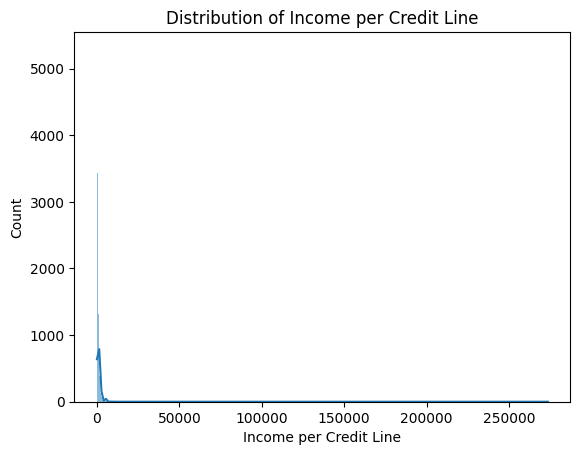

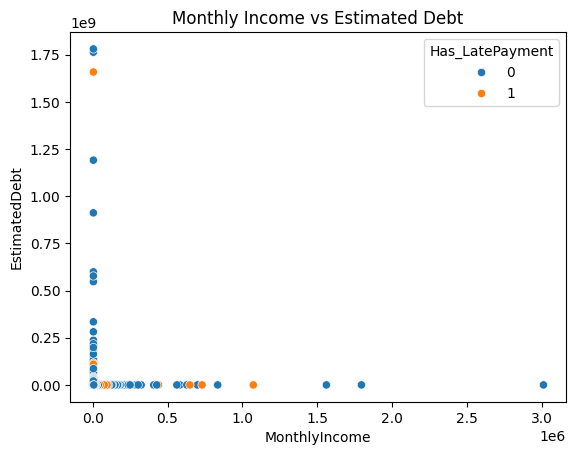

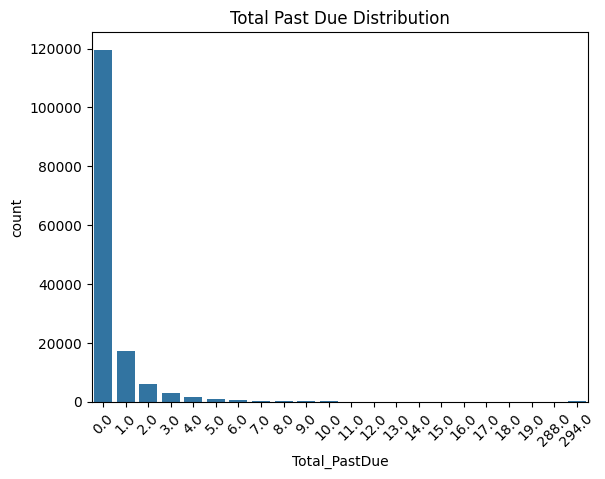

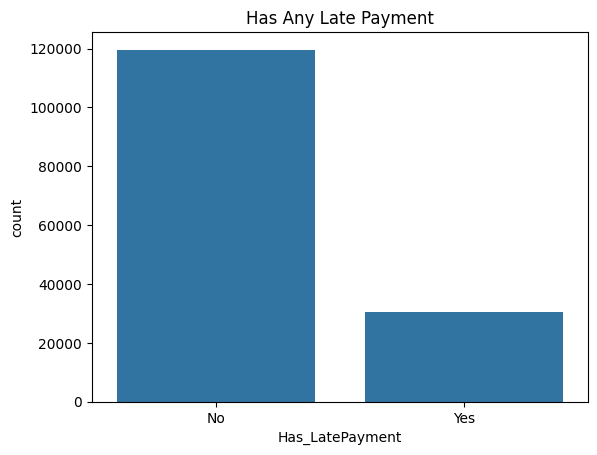

In [33]:

sns.histplot(df['Income_per_CreditLine'], kde=True)
plt.title('Distribution of Income per Credit Line')
plt.xlabel('Income per Credit Line')
plt.show()


#  How debt scales with income. Compare between late payers.
sns.scatterplot(x='MonthlyIncome', y='EstimatedDebt', hue='Has_LatePayment', data=df)
plt.title('Monthly Income vs Estimated Debt')
plt.show()

#  Concentration of users with no past dues vs those with several.
sns.countplot(x='Total_PastDue', data=df)
plt.title('Total Past Due Distribution')
plt.xticks(rotation=45)
plt.show()


sns.countplot(x='Has_LatePayment', data=df)
plt.title('Has Any Late Payment')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [32]:
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output

# Apply feature engineering (make sure this is defined)
df = feature_engineering(df)

app = Dash(__name__)
app.title = "Credit Risk Dashboard"

app.layout = html.Div([
    html.H1("💳 Credit Risk Dashboard", style={'textAlign': 'center', 'color': '#007acc'}),

    html.Div([
        html.Label("Monthly Income Range"),
        dcc.RangeSlider(
            id='income-slider',
            min=0,
            max=df['MonthlyIncome'].quantile(0.95),
            step=500,
            value=[0, df['MonthlyIncome'].quantile(0.50)],
            tooltip={"placement": "bottom", "always_visible": True}
        ),
        html.Br(),

        html.Label("Debt Ratio Range"),
        dcc.RangeSlider(
            id='debt-slider',
            min=0,
            max=2.0,
            step=0.01,
            value=[0, 1.0],
            tooltip={"placement": "bottom", "always_visible": True}
        ),
        html.Br(),

        html.Label("Filter by Late Payment"),
        dcc.Dropdown(
            id='late-dropdown',
            options=[
                {'label': 'All', 'value': 'all'},
                {'label': 'Only Late Payers', 'value': 1},
                {'label': 'Only On-Time Payers', 'value': 0},
            ],
            value='all',
            clearable=False,
            style={'width': '50%'}
        )
    ]),

    html.Div([
        dcc.Graph(id='scatter-plot'),
        dcc.Graph(id='histogram'),
        dcc.Graph(id='box-plot'),
        dcc.Graph(id='bar-chart')
    ], style={
        'display': 'grid',
        'gridTemplateColumns': '1fr 1fr',
        'gap': '20px',
        'padding': '20px'
    }),

    html.Div([
        dcc.Graph(id='correlation-heatmap')
    ], style={'padding': '20px'})
])

@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('histogram', 'figure'),
     Output('correlation-heatmap', 'figure'),
     Output('bar-chart', 'figure'),
     Output('box-plot', 'figure')],
    [Input('income-slider', 'value'),
     Input('debt-slider', 'value'),
     Input('late-dropdown', 'value')]
)
def update_dashboard(income_range, debt_range, late_filter):
    filtered_df = df[
        (df['MonthlyIncome'] >= income_range[0]) &
        (df['MonthlyIncome'] <= income_range[1]) &
        (df['DebtRatio'] >= debt_range[0]) &
        (df['DebtRatio'] <= debt_range[1])
    ]
    if late_filter in [0, 1]:
        filtered_df = filtered_df[filtered_df['Has_LatePayment'] == late_filter]

    scatter_fig = px.scatter(
        filtered_df,
        x='MonthlyIncome',
        y='EstimatedDebt',
        color='Has_LatePayment',
        title="Monthly Income vs Estimated Debt",
        labels={'Has_LatePayment': 'Late Payment'}
    )

    hist_fig = px.histogram(
        filtered_df,
        x='Income_per_CreditLine',
        nbins=40,
        title="Distribution of Income per Credit Line",
        color='Has_LatePayment',
        barmode='overlay',
        opacity=0.75
    )

    corr = filtered_df[['MonthlyIncome', 'DebtRatio', 'Income_per_CreditLine',
                        'Income_to_DebtRatio', 'EstimatedDebt', 'Total_PastDue',
                        'LatePayment_to_Loans']].corr()
    heatmap = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='Blues'
    ))
    heatmap.update_layout(title="Feature Correlation Heatmap")

    if 'NumberOfDependents' in filtered_df.columns:
        bar_data = filtered_df.groupby('NumberOfDependents')['EstimatedDebt'].mean().reset_index()
        bar_fig = px.bar(bar_data, x='NumberOfDependents', y='EstimatedDebt',
                         title="Avg Estimated Debt by Number of Dependents",
                         labels={'EstimatedDebt': 'Avg Estimated Debt'})
    else:
        bar_fig = go.Figure().update_layout(title="NumberOfDependents column missing")

    box_fig = px.box(
        filtered_df,
        x='Has_LatePayment',
        y='Income_to_DebtRatio',
        color='Has_LatePayment',
        title="Income to Debt Ratio by Late Payment Status",
        labels={'Has_LatePayment': 'Late Payment'}
    )

    return scatter_fig, hist_fig, heatmap, bar_fig, box_fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

**Model Training**

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply feature engineering
df = feature_engineering(df)

# Split features and target
X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

In [16]:
from sklearn.compose import ColumnTransformer

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify numeric columns
num_features = X.select_dtypes(exclude='object').columns

# Create ColumnTransformer
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[('scaler', numeric_transformer, num_features)],
    remainder='passthrough'
)

# Fit and transform
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# ---------------------------
# Apply SMOTE
# ---------------------------

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Class distribution check
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Before SMOTE:
SeriousDlqin2yrs
0.0    111979
1.0      8021
Name: count, dtype: int64

After SMOTE:
SeriousDlqin2yrs
0.0    111979
1.0    111979
Name: count, dtype: int64


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# Required imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

best_model = None
best_model_name = ""
best_composite_score = 0.0  # Store best composite metric score

for name, model in models.items():
    # Train model on SMOTE balanced data
    model.fit(X_train_smote, y_train_smote)

    # Predict on training and test data
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_scaled)

    # Training metrics
    acc_train = accuracy_score(y_train_smote, y_train_pred)
    f1_train = f1_score(y_train_smote, y_train_pred)
    precision_train = precision_score(y_train_smote, y_train_pred)
    recall_train = recall_score(y_train_smote, y_train_pred)
    roc_auc_train = roc_auc_score(y_train_smote, model.predict_proba(X_train_smote)[:, 1])

    # Test metrics
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    # Composite score for model selection
    composite_score = (roc_auc_test + f1_test + recall_test) / 3

    if composite_score > best_composite_score:
        best_composite_score = composite_score
        best_model = model
        best_model_name = name

    # Print model performance
    print(f"Model: {name}")
    print("Training Performance:")
    print(f"Accuracy: {acc_train:.4f} | F1: {f1_train:.4f} | Precision: {precision_train:.4f} | Recall: {recall_train:.4f} | ROC AUC: {roc_auc_train:.4f}")
    print("Test Performance:")
    print(f"Accuracy: {acc_test:.4f} | F1: {f1_test:.4f} | Precision: {precision_test:.4f} | Recall: {recall_test:.4f} | ROC AUC: {roc_auc_test:.4f}")
    print("="*50)

# Save best model and preprocessor
print(f"\n✅ Best Model: {best_model_name} with composite score: {best_composite_score:.4f}")




Model: Random Forest
Training Performance:
Accuracy: 0.9998 | F1: 0.9998 | Precision: 0.9997 | Recall: 0.9999 | ROC AUC: 1.0000
Test Performance:
Accuracy: 0.9139 | F1: 0.3324 | Precision: 0.3450 | Recall: 0.3207 | ROC AUC: 0.8189
Model: Gradient Boosting
Training Performance:
Accuracy: 0.8587 | F1: 0.8575 | Precision: 0.8650 | Recall: 0.8502 | ROC AUC: 0.9378
Test Performance:
Accuracy: 0.8539 | F1: 0.3723 | Precision: 0.2611 | Recall: 0.6484 | ROC AUC: 0.8505


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:12:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Training Performance:
Accuracy: 0.9450 | F1: 0.9434 | Precision: 0.9720 | Recall: 0.9165 | ROC AUC: 0.9863
Test Performance:
Accuracy: 0.9237 | F1: 0.3646 | Precision: 0.4109 | Recall: 0.3277 | ROC AUC: 0.8381

✅ Best Model: Gradient Boosting with composite score: 0.6237


In [18]:
import pickle

# Assume `model` and `preprocessor` are already trained
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


In [19]:


# CAN run this if you have Good CPU and GPU support


# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter distribution for Gradient Boosting
# param_dist = {
#     'n_estimators': [100, 200],         # 2 options
#     'learning_rate': [0.05, 0.1],       # 2 options
#     'max_depth': [3, 4],                 # 2 options
#     'min_samples_split': [2, 5],         # 2 options
#     'min_samples_leaf': [1, 2]           # 2 options
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=GradientBoostingClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=30,              # Try 30 random combos
#     scoring='roc_auc',
#     cv=3,                   # 3-fold cross-validation
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# # Fit the random search to the SMOTE-resampled training data
# print("Starting Randomized Search for Gradient Boosting...")
# random_search.fit(X_train_smote, y_train_smote)

# # Print best parameters and best score
# print("\nBest parameters found:")
# print(random_search.best_params_)

# print("\nBest cross-validation ROC AUC score:")
# print(random_search.best_score_)

# # Get the best model from RandomizedSearchCV
# best_gbm_model = random_search.best_estimator_

# # Make predictions on the test set (X_test_scaled should be preprocessed)
# y_test_pred_best_gbm = best_gbm_model.predict(X_test_scaled)
# y_test_proba_best_gbm = best_gbm_model.predict_proba(X_test_scaled)[:, 1]

# # Evaluate test performance
# acc_test_best_gbm = accuracy_score(y_test, y_test_pred_best_gbm)
# f1_test_best_gbm = f1_score(y_test, y_test_pred_best_gbm)
# precision_test_best_gbm = precision_score(y_test, y_test_pred_best_gbm)
# recall_test_best_gbm = recall_score(y_test, y_test_pred_best_gbm)
# roc_auc_test_best_gbm = roc_auc_score(y_test, y_test_proba_best_gbm)

# print("\nTest Performance with Tuned Gradient Boosting:")
# print(f"Accuracy: {acc_test_best_gbm:.4f}")
# print(f"F1 Score: {f1_test_best_gbm:.4f}")
# print(f"Precision: {precision_test_best_gbm:.4f}")
# print(f"Recall: {recall_test_best_gbm:.4f}")
# print(f"ROC AUC: {roc_auc_test_best_gbm:.4f}")

# # Plot confusion matrix
# cm_best_gbm = confusion_matrix(y_test, y_test_pred_best_gbm)
# disp_best_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_best_gbm, display_labels=best_gbm_model.classes_)
# disp_best_gbm.plot()
# plt.title("Confusion Matrix for Tuned Gradient Boosting")
# plt.show()

# # Plot ROC curve
# fpr_best_gbm, tpr_best_gbm, _ = roc_curve(y_test, y_test_proba_best_gbm)
# plt.figure()
# plt.plot(fpr_best_gbm, tpr_best_gbm, label=f'Tuned Gradient Boosting (AUC = {roc_auc_test_best_gbm:.4f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Tuned Gradient Boosting')
# plt.legend(loc="lower right")
# plt.show()


Checking Feature Importance

In [20]:


import pandas as pd
import matplotlib.pyplot as plt

# Get importance scores
importances = model.feature_importances_
feature_names = X_train.columns  # or use list if you know order
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# View top N
print(importance_df.head(10))




                                 Feature  Importance
13                         Total_PastDue    0.263221
15                       Has_LatePayment    0.242306
14                  LatePayment_to_Loans    0.085544
6                NumberOfTimes90DaysLate    0.071672
0   RevolvingUtilizationOfUnsecuredLines    0.066799
5        NumberOfOpenCreditLinesAndLoans    0.064886
8   NumberOfTime60-89DaysPastDueNotWorse    0.059688
1                                    age    0.034289
2   NumberOfTime30-59DaysPastDueNotWorse    0.023176
3                              DebtRatio    0.020576


In [21]:
# import streamlit as st
# import pickle
# import pandas as pd

# # --- Unique values dictionary for some categorical sliders ---
# unique_values_dict = {
#     'RevolvingUtilizationOfUnsecuredLines': [],
#     'age': [],
#     'NumberOfTime30-59DaysPastDueNotWorse': [0, 1, 2, 3, 4, 5],
#     'DebtRatio': [],
#     'MonthlyIncome': [],
#     'NumberOfOpenCreditLinesAndLoans': [0, 1, 2, 3, 4, 5, 6, 7, 8],
#     'NumberOfTimes90DaysLate': [0, 1, 2],
#     'NumberRealEstateLoansOrLines': [0, 1, 2, 3],
#     'NumberOfTime60-89DaysPastDueNotWorse': [0, 1, 2, 3, 4],
#     'NumberOfDependents': [0, 1, 2, 3]
# }

# # --- Input UI Function ---
# def user_input_features():
#     data = {}
#     features = list(unique_values_dict.keys())

#     st.markdown("""
#     <style>
#     .header-text { color: #004466; font-weight: 700; font-size: 32px; margin-bottom: 15px; }
#     .subheader-text { color: #007acc; font-weight: 600; font-size: 20px; margin-top: 20px; margin-bottom: 10px; }
#     .stNumberInput > label { font-weight: 600; color: #004466; }
#     </style>
#     """, unsafe_allow_html=True)

#     st.markdown('<div class="header-text">Applicant Details</div>', unsafe_allow_html=True)

#     col1, col2 = st.columns(2)

#     for i, feature in enumerate(features):
#         uniques = unique_values_dict.get(feature, [])
#         container = col1 if i % 2 == 0 else col2
#         label = feature.replace('_', ' ')

#         with container:
#             if uniques and len(uniques) <= 12:
#                 data[feature] = st.select_slider(label=label, options=uniques, value=uniques[0], key=feature)
#             else:
#                 if feature == 'RevolvingUtilizationOfUnsecuredLines':
#                     data[feature] = st.number_input('Revolving Utilization Of Unsecured Lines', min_value=0.0, max_value=10.0, value=0.5, step=0.01, format="%.2f", key=feature)
#                 elif feature == 'age':
#                     data[feature] = st.number_input('Age', min_value=18, max_value=100, value=30, step=1, key=feature)
#                 elif feature == 'DebtRatio':
#                     data[feature] = st.number_input('Debt Ratio', min_value=0.0, max_value=10.0, value=0.0, step=0.01, format="%.2f", key=feature)
#                 elif feature == 'MonthlyIncome':
#                     data[feature] = st.number_input('Monthly Income', min_value=0.0, max_value=1_000_000.0, value=5000.0, step=100.0, format="%.2f", key=feature)
#                 else:
#                     data[feature] = st.number_input(label, min_value=0, max_value=1_000_000, value=0, step=1, key=feature)

#     return pd.DataFrame(data, index=[0])

# # --- Feature Engineering Function ---
# def apply_feature_engineering(df):
#     df['IncomePerPerson'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
#     df['DebtPerIncome'] = df['DebtRatio'] * df['MonthlyIncome']
#     df['TotalLatePayments'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate'] + df['NumberOfTime60-89DaysPastDueNotWorse']
#     return df

# # --- Load Models ---
# @st.cache_data(show_spinner=False)
# def load_model():
#     with open('gbm_model.pkl', 'rb') as f:
#         model = pickle.load(f)
#     with open('preprocessor.pkl', 'rb') as f:
#         preprocessor = pickle.load(f)
#     return model, preprocessor

# model, preprocessor = load_model()

# # --- Styling and Title ---
# st.markdown("""
# <style>
# .main { background-color: #f0f8ff; padding: 25px 40px 40px 40px; border-radius: 12px; }
# .stButton > button {
#     background-color: #007acc;
#     color: white;
#     font-weight: 700;
#     border-radius: 10px;
#     padding: 12px 20px;
#     font-size: 16px;
#     transition: background-color 0.3s ease;
# }
# .stButton > button:hover { background-color: #005f99; }
# </style>
# """, unsafe_allow_html=True)

# st.title("💳 Credit Risk Prediction App")
# st.markdown("Enter applicant details below to predict the probability of **serious delinquency within 2 years**.")

# # --- Input ---
# input_df = user_input_features()
# st.markdown("<br>", unsafe_allow_html=True)

# # --- Prediction Button ---
# if st.button("Predict Risk"):
#     try:
#         # 1. Apply Feature Engineering
#         engineered_df = apply_feature_engineering(input_df)

#         # 2. Transform with preprocessor
#         processed_input = preprocessor.transform(engineered_df)

#         # 3. Predict
#         risk_prob = model.predict_proba(processed_input)[:, 1][0]

#         st.markdown('<div class="subheader-text">Prediction Result</div>', unsafe_allow_html=True)

#         # 4. Result Display
#         if risk_prob > 0.5:
#             st.markdown(f"""
#             <div style="background-color:#f8d7da; padding:20px; border-radius:15px;
#                         color:#721c24; font-weight:700; font-size:18px;
#                         box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
#                 ⚠️ <b>High Risk!</b> Probability of Serious Delinquency: {risk_prob:.4f}
#             </div>""", unsafe_allow_html=True)
#         else:
#             st.markdown(f"""
#             <div style="background-color:#d4edda; padding:20px; border-radius:15px;
#                         color:#155724; font-weight:700; font-size:18px;
#                         box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
#                 ✅ <b>Low Risk</b> Probability of Serious Delinquency: {risk_prob:.4f}
#             </div>""", unsafe_allow_html=True)

#     except Exception as e:
#         st.error(f"❌ Error during prediction: {e}")
